<a href="https://colab.research.google.com/github/megharai22/Face-Mask-Detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os
os.environ['KAGGLE_USERNAME']='megharai22'
os.environ['KAGGLE_KEY']='33251436ea90718a047217c4c60251e4'

In [ ]:
! kaggle datasets download -d omkargurav/face-mask-dataset

 93% 151M/163M [00:01<00:00, 118MB/s]
100% 163M/163M [00:01<00:00, 137MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0803.jpg', '0770.jpg', '0427.jpg', '1137.jpg', '0506.jpg', '0158.jpg', '1346.jpg', '0243.jpg', '0006.jpg', '0216.jpg']
['132.jpg', '100.jpg', '47.jpg', '105.jpg', '215.jpg', '300.jpg', '258.jpg', '66.jpg', '84.jpg', '18.jpg']


In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)  

merged_list = mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show  



In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )


Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding= 'SAME' ,activation='relu' ,input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding= 'SAME' ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 37, 37, 64)       

In [ ]:
model.compile(Adam(learning_rate=0.005),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, 
                    epochs = 100,
                    validation_data = valid_generator)


Epoch 1/100
19/19 [==============================] - 13s 654ms/step - loss: 0.5701 - accuracy: 0.8400 - val_loss: 0.4896 - val_accuracy: 0.8627
Epoch 2/100
19/19 [==============================] - 12s 627ms/step - loss: 0.4156 - accuracy: 0.8517 - val_loss: 0.3705 - val_accuracy: 0.8693
Epoch 3/100
19/19 [==============================] - 12s 630ms/step - loss: 0.3418 - accuracy: 0.8633 - val_loss: 0.3280 - val_accuracy: 0.8987
Epoch 4/100
19/19 [==============================] - 12s 634ms/step - loss: 0.2639 - accuracy: 0.9100 - val_loss: 0.3856 - val_accuracy: 0.8725
Epoch 5/100
19/19 [==============================] - 12s 633ms/step - loss: 0.3610 - accuracy: 0.8817 - val_loss: 0.3000 - val_accuracy: 0.9052
Epoch 6/100
19/19 [==============================] - 12s 628ms/step - loss: 0.2549 - accuracy: 0.9200 - val_loss: 0.3196 - val_accuracy: 0.8725
Epoch 7/100
19/19 [==============================] - 12s 634ms/step - loss: 0.2632 - accuracy: 0.9000 - val_loss: 0.2501 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

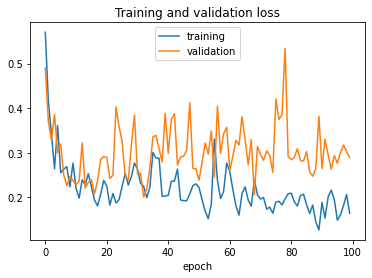

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

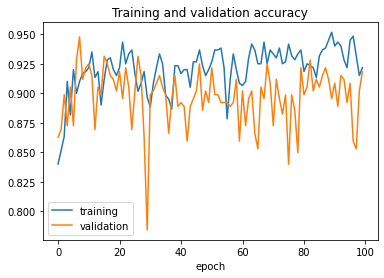

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test loss:{}' 'test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 236ms/step - loss: 0.2332 - accuracy: 0.8800
test loss:0.23321960866451263test acc:0.8799999952316284


In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction =  model.predict(images)
  print(fname)
  
  if prediction==1 :
    print('\033[92m' + 'NO MASK')
  
  else:
    print('\033[91m' +'MASK')


In [ ]:
model.save('model.h5')